In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new sets
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

print("\nValidation set shape:", x_val.shape)
print("Validation set shape:", y_val.shape)

print("\nTest set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (48000, 28, 28)
Training labels shape: (48000,)

Validation set shape: (12000, 28, 28)
Validation set shape: (12000,)

Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
# #Normalize the data

x_train = (x_train - 0.2860) / 0.3530
x_val = (x_val - 0.2860) / 0.3530
x_test = (x_test - 0.2860) / 0.3530


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train[0].shape

(28, 28, 1)

# Add L2 Regularization - 0.01

In [ ]:
from tensorflow.keras import regularizers

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                  input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Add L2 Regularization - 0.1

In [ ]:
from tensorflow.keras import regularizers

cnn_2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                  input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.1)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

cnn.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import Adam

cnn_2.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

#Training and Validation curves for L2 Regularization - 0.01

In [ ]:
baseline_cnn_1 = cnn.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=50,
                        batch_size=16)  # Experiment with smaller batch size

Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6823 - loss: 3.2793 - val_accuracy: 0.8138 - val_loss: 1.6181
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8450 - loss: 1.4107 - val_accuracy: 0.8599 - val_loss: 1.1230
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8776 - loss: 1.0028 - val_accuracy: 0.8782 - val_loss: 0.8357
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8938 - loss: 0.7543 - val_accuracy: 0.8844 - val_loss: 0.6770
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9012 - loss: 0.6111 - val_accuracy: 0.8902 - val_loss: 0.5840
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9089 - loss: 0.5244 - val_accuracy: 0.8926 - val_loss: 0.5326
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9123 - loss: 0.4629 - val_accuracy: 0.8925 - val_loss: 0.4934
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9174 - loss: 0.422

Final training accuracy: 0.9590
Final validation accuracy: 0.9072
Final training loss: 0.2225
Final validation loss: 0.3764


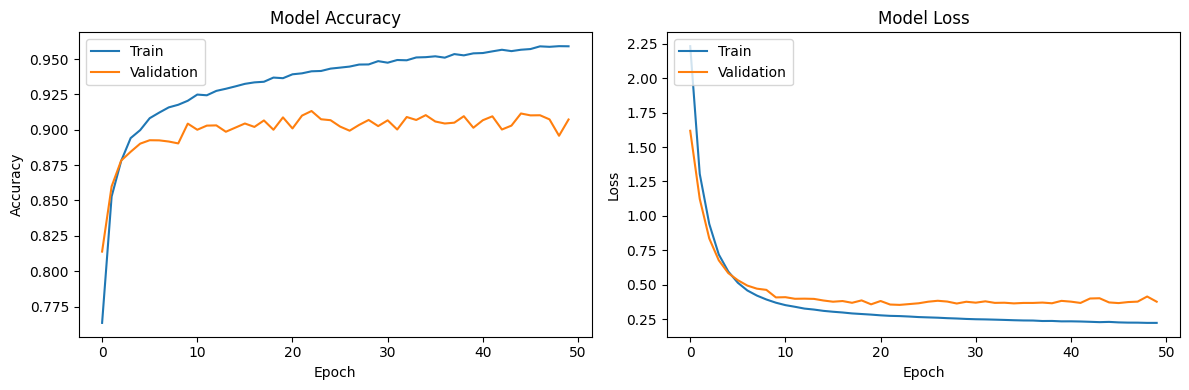

In [ ]:
print(f"Final training accuracy: {baseline_cnn_1.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {baseline_cnn_1.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {baseline_cnn_1.history['loss'][-1]:.4f}")
print(f"Final validation loss: {baseline_cnn_1.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_cnn_1.history['accuracy'])
plt.plot(baseline_cnn_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(baseline_cnn_1.history['loss'])
plt.plot(baseline_cnn_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

#Training and Validation curves for L2 Regularization - 0.1

In [ ]:
baseline_cnn = cnn_2.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=50,
                        batch_size=32)  # Experiment with smaller batch size

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6450 - loss: 14.8600 - val_accuracy: 0.8196 - val_loss: 6.2912
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8314 - loss: 5.2796 - val_accuracy: 0.8512 - val_loss: 3.0822
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8544 - loss: 2.6579 - val_accuracy: 0.8581 - val_loss: 1.7102
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8639 - loss: 1.5087 - val_accuracy: 0.8669 - val_loss: 1.0830
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8671 - loss: 0.9971 - val_accuracy: 0.8631 - val_loss: 0.8113
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8677 - loss: 0.7587 - val_accuracy: 0.8685 - val_loss: 0.6723
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8715 - loss: 0.6401 - val_accuracy: 0.8501 - val_loss: 0.6341
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8732 - loss: 0.5784 

Final training accuracy: 0.8888
Final validation accuracy: 0.8840
Final training loss: 0.4234
Final validation loss: 0.4489


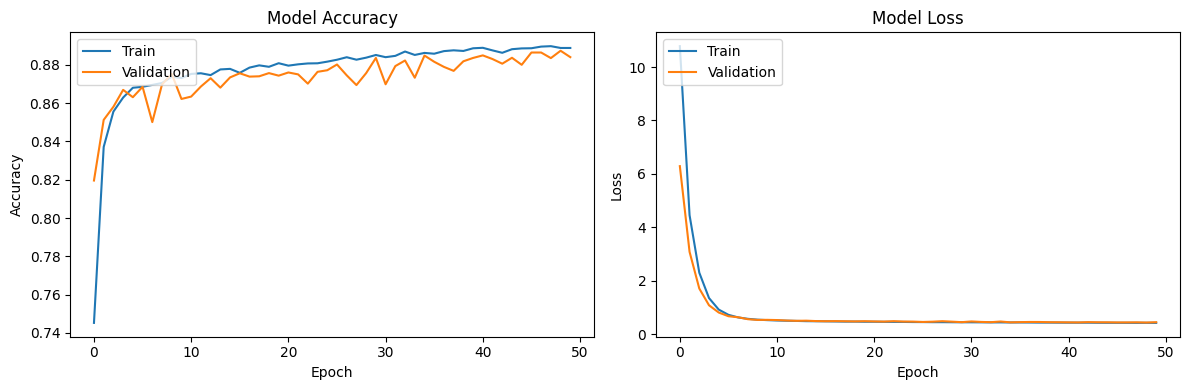

In [ ]:
print(f"Final training accuracy: {baseline_cnn.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {baseline_cnn.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {baseline_cnn.history['loss'][-1]:.4f}")
print(f"Final validation loss: {baseline_cnn.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_cnn.history['accuracy'])
plt.plot(baseline_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(baseline_cnn.history['loss'])
plt.plot(baseline_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()